In [1]:
from lens import *
import matplotlib.pyplot as plt
import sympy as sp
%matplotlib widget 

pygame 2.3.0 (SDL 2.24.2, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
g = KerrGravitizer(0,0,0,5,0.1)

In [3]:
g.metric.metric

Matrix([
[         -0.0016*cos(th)**4 - 1 + 5/r,                                            0,                        0,                               -0.0016*cos(th)**4 - 0.4*sin(th)**2/r],
[                                    0, r**2 - 5*r + 0.0016 + 0.0016*cos(th)**4/r**2,                        0,                                                                   0],
[                                    0,                                            0, r**2 + 0.0016*cos(th)**4,                                                                   0],
[-0.0016*cos(th)**4 - 0.4*sin(th)**2/r,                                            0,                        0, (r**2 + 0.0016*cos(th)**4 + 0.0016 + 0.008*sin(th)**2/r)*sin(th)**2]])

In [2]:
g2 = SchwarzschildGravitizerSpherical(-2000,0,0,0)
g = SchwarzschildGravitizerSpherical(-2000,0,0,100)

In [11]:
sp.simplify(g.metric.christoffel(1,3,3))

(100.0 - 1.0*r)*sin(th)**2

In [4]:
g.metric.christoffel(1,2,2)

100.0 - 1.0*r

In [28]:
g.metric.metric

Matrix([
[-1 + 100/r,             0,    0,               0],
[         0, 1/(1 - 100/r),    0,               0],
[         0,             0, r**2,               0],
[         0,             0,    0, r**2*sin(th)**2]])

In [40]:
g.metric.metric.adjoint()

Matrix([
[-1 + 100/conjugate(r),                        0,               0,                                     0],
[                    0, 1/(1 - 100/conjugate(r)),               0,                                     0],
[                    0,                        0, conjugate(r)**2,                                     0],
[                    0,                        0,               0, sin(conjugate(th))**2*conjugate(r)**2]])

In [43]:
g.metric.metric.inv()

Matrix([
[-r/(r - 100),           0,       0,                   0],
[           0, (r - 100)/r,       0,                   0],
[           0,           0, r**(-2),                   0],
[           0,           0,       0, 1/(r**2*sin(th)**2)]])

In [29]:
g.metric.inverse_metric

Matrix([
[(-1 + 100/conjugate(r))*(1 - 100/r)/(r**4*(-1 + 100/r)*sin(th)**2),                                                                 0,                                                          0,                                                                                0],
[                                                                 0, (1 - 100/r)/(r**4*(-1 + 100/r)*(1 - 100/conjugate(r))*sin(th)**2),                                                          0,                                                                                0],
[                                                                 0,                                                                 0, (1 - 100/r)*conjugate(r)**2/(r**4*(-1 + 100/r)*sin(th)**2),                                                                                0],
[                                                                 0,                                                                 0,                   

In [24]:
print(g.metric.get_element(2,2))
sp.diff(g.metric.get_element(2,2),'r')

r**2


2*r

In [24]:
print(g.metric.get_element(2,2))
sp.diff(g.metric.get_element(2,2),'r')

r**2


2*r

The photon travels 3 'light-seconds' in 3 'seconds'

In [91]:
f = Flashlight(x=0,y=0,z=0,n_rays=1,width=0,phi=0,theta=90, flat=False)
g2 = FlatSpace(x=0,y=0,z=0)
sim = Simulator(f,g2)

In [92]:
sim.reset()

In [93]:
# until t = 3 with dt = 0.1
sim.evolve(3,0.1)

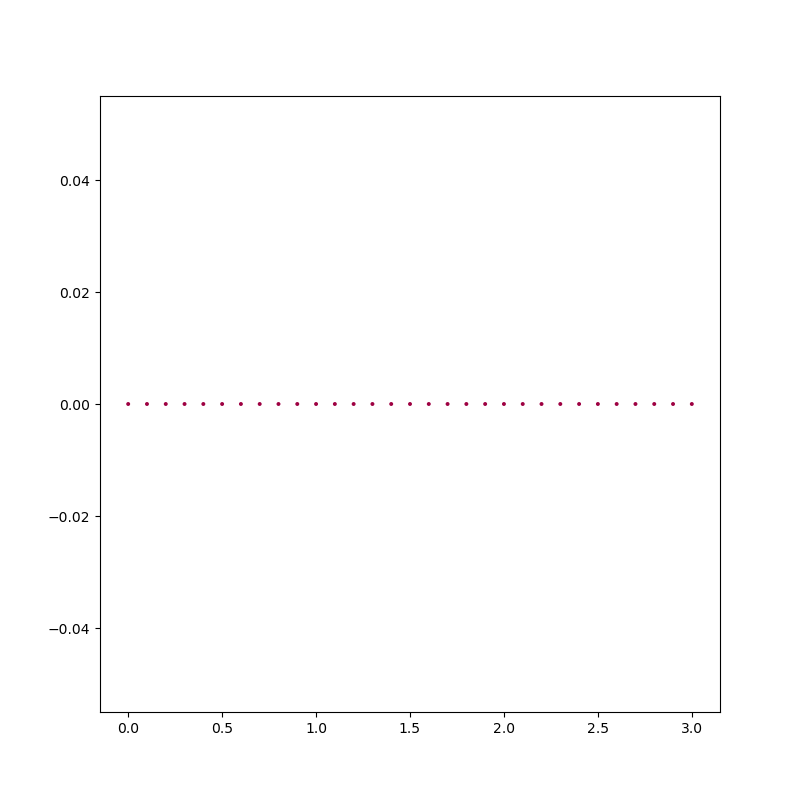

In [94]:
%matplotlib widget
sim.draw(threeD=False)

Gravitational Lensing Stuff

In [4]:
# f = Flashlight(-2000,0,0,1,0,0,0, flat=False)
g2 = SchwarzschildGravitizerSpherical(x=0,y=0,z=0,rs=100)
# g2 = SchwarzschildGravitizer3D(0,0,0,100)
f = Flashlight(-2000,0,0,8,45,0,90, flat=False)
f2 = Flashlight(-2000,0,0,8,30,0,90, flat=False)
f3 = Flashlight(-2000,0,0,8,15,0,90, flat=False)
# g2 = FlatSpace(0,0,0,0)
sim = Simulator([f,f2,f3],g2)

In [5]:
sim.reset()

In [6]:
sim.evolve(6600,200)

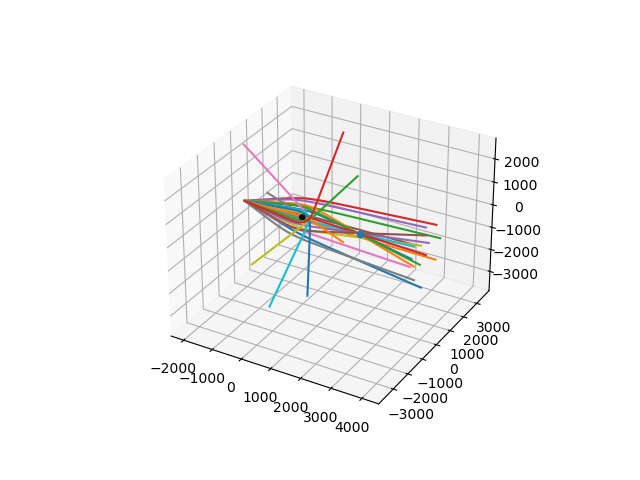

In [8]:
%matplotlib widget
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
sim.draw(threeD=True, ax=ax)
ax.scatter(1950, 0, 0)

In [25]:
ph_at_foc = []
for source in sim.sources:
    for ph in source.photons:
        xl = np.array(ph.x_list)
        yl = np.array(ph.y_list)
        zl = np.array(ph.z_list)
        min_x = np.min(abs(xl - 1950))
        min_y = np.min(abs(yl - 0))
        min_z = np.min(abs(zl - 0))
        loc_x = np.argmin(min_x)
        loc_y = np.argmin(min_y)
        loc_z = np.argmin(min_z)
        
        if min_x < 200 and min_y < 200 and min_z < 200 and (loc_x == loc_y == loc_z): # if distance from focus is less than step size
            ph_at_foc.append((ph, np.argmin(abs(xl - 1950))))


In [26]:
ph_at_foc[0][1] # step of intersection

22

In [27]:
flat_phs = []
for ph, i in ph_at_foc:
    if abs(ph.vz) < 1e-5:
        flat_phs.append(ph)
len(flat_phs)

4

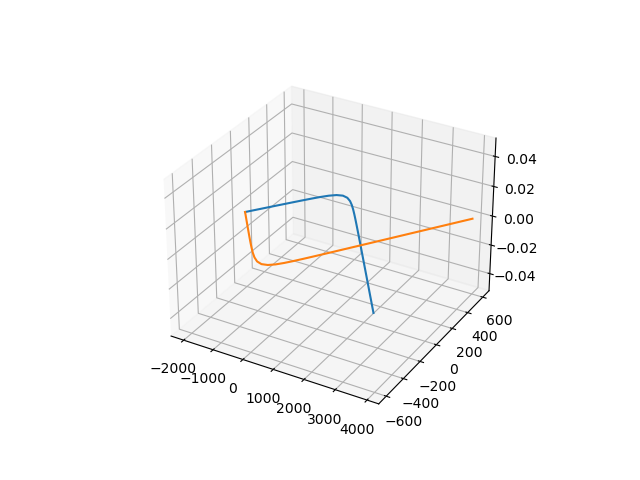

In [42]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
for_real_this_time = []
for ph in flat_phs:
#     print(np.diff(np.sign(np.array(ph.y_list) - 0))[1:])
    if np.diff(np.sign(np.array(ph.y_list) - 0))[1:].any():
        for_real_this_time.append(ph)
        ax.plot(ph.x_list, ph.y_list, 0)


Using a photon that crosses this focus without a z velocity component, the y component of the velocity is the transverse direction from the observer's POV. Using simple trigonometry, the angle that the observer sees is related to this by sin(θ) = vy/1 = vy.

θE=[2Rs(DLS/DSDL)]1/2

In [43]:
for_real_this_time[1].vy

0.2712178289151522

In [49]:
np.arcsin(for_real_this_time[1].vy)*180/np.pi

15.736747617471941

In [47]:
(2*100*(2000/(2000*4000)))**(1/2)*180/np.pi

12.811725781509189

More astronomical situation

In [153]:
g2 = SchwarzschildGravitizerSpherical(-1.86e17,0,0,1.5e8)
f = Flashlight(-2.40e17,0,0,2,2.687/60,0,90, flat=False)
f2 = Flashlight(-2.40e17,0,0,4,.5,0,90, flat=False)

sim = Simulator([f,f2],g2)

In [154]:
sim.reset()

In [155]:
sim.evolve(3e17,1e15)

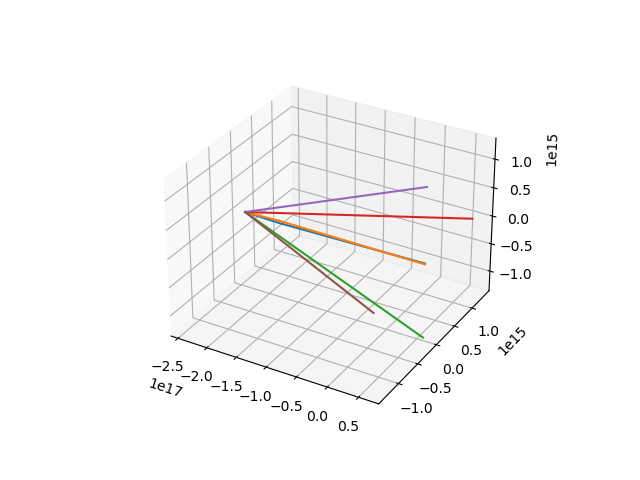

In [156]:
%matplotlib widget
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
sim.draw(threeD=True, ax=ax)
# ax.scatter(1950, 0, 0)

In [161]:
for ph in f.photons:
    xl = np.array(ph.x_list)
    yl = np.array(ph.y_list)
    zl = np.array(ph.z_list)
    min_x = np.min(abs(xl[1:]))
    min_y = np.min(abs(yl[1:]))
    min_z = np.min(abs(zl[1:]))
    loc_x = np.argmin(abs(xl[1:]))
    loc_y = np.argmin(abs(yl[1:]))
    loc_z = np.argmin(abs(zl[1:]))
    print(min_x, min_y, min_z, loc_x,loc_y,loc_z)


10636031670.25 0.0 55030124915.77257 239 0 237
10405522009.25 4.7860213037935e-05 55034928114.66063 239 0 237


Using a photon that crosses y velocity component, the z component of the velocity is the transverse direction from the observer's POV. Using simple trigonometry, the angle that the observer sees is related to this by sin(θ) = vz/1 = vz.

θE=[2Rs(DLS/DSDL)]1/2

In [178]:
f.photons[0].x_list[240]

-10636031670.25

In [187]:
vz =(f.photons[0].z_list[239]-f.photons[0].z_list[238])/(f.photons[0].x_list[239]-f.photons[0].x_list[238])

In [164]:
f.photons[0].vz

0.00011439466431740876

In [188]:
np.arcsin(vz)*180/np.pi*60*60

23.595593491428374

In [172]:
(2*1.5e8*((2.40e17-1.86e17)/(2.40e17*1.86e17)))**(1/2)*180/np.pi*60*60

3.929348488357638

In [189]:
# f = Flashlight(-20000,0,0,8,15,0,90, flat=False)
# f2 = Flashlight(-20000,0,0,8,10,0,90, flat=False)
f3 = Flashlight(-20000,0,0,8,5,0,90, flat=False)
f4 = Flashlight(-20000,0,0,8,1,0,90, flat=False)

g2 = SchwarzschildGravitizerSpherical(-2000,0,0,1)
sim = Simulator([f3,f4],g2)

In [190]:
sim.reset()

In [191]:
sim.evolve(25000,500)

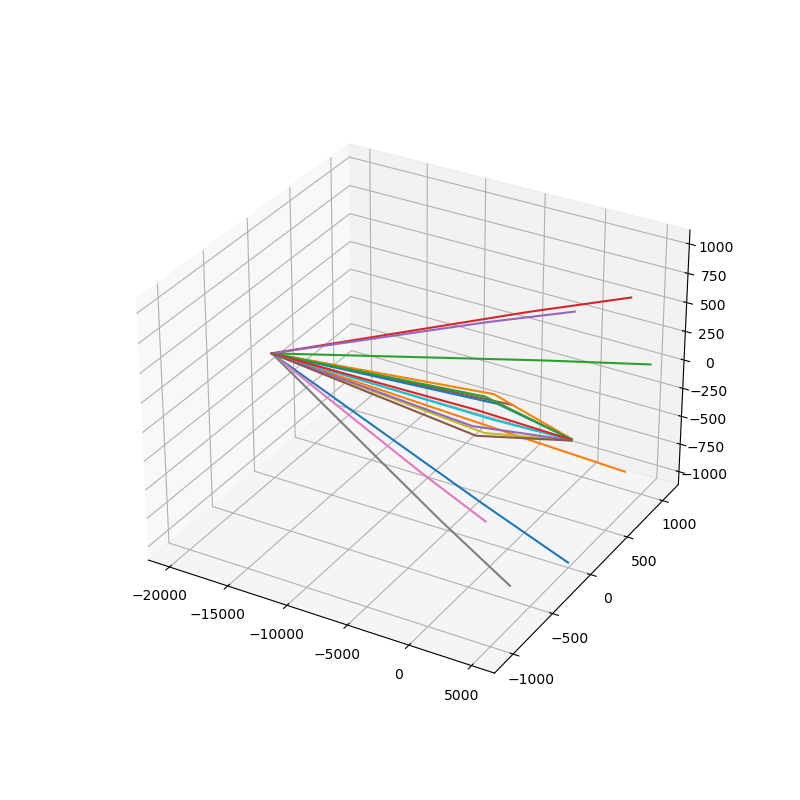

In [192]:
%matplotlib widget
sim.draw(threeD=True)

In [95]:
f = Flashlight(0,3/2*5,0,1,15,0,90)
# g = SchwarzschildGravitizer3D(0,0,0,5)
g = SchwarzschildGravitizerSpherical(0,0,0,5)
sim2 = Simulator(f,g)

In [111]:
sim2.reset()

In [112]:
sim2.evolve(70,0.01)

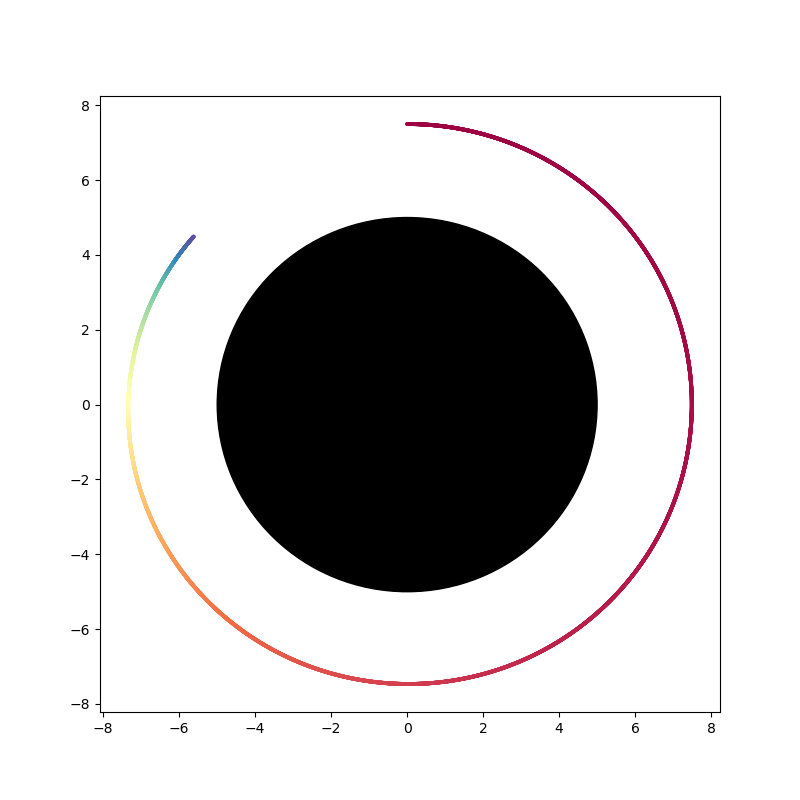

In [113]:
# fig, ax = plt.subplots()
# ax.grid()
sim2.draw()

In [21]:
f = Flashlight(20,10,0,3,15,-60)
# g = SchwarzschildGravitizer2D(0,0,20)
g = SchwarzschildGravitizerSpherical(0,0,0,5)
sim2 = Simulator(f,g)

In [22]:
sim2.reset()

In [39]:
sim2.evolve(600,0.5)

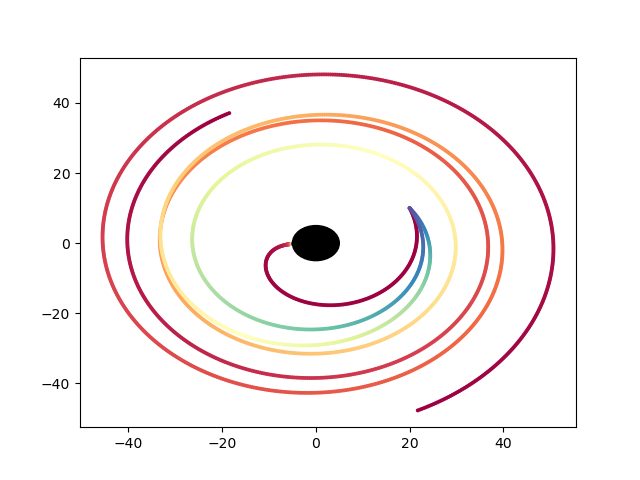

In [40]:
fig, ax = plt.subplots()
# ax.grid()
sim2.draw(ax=ax)

In [47]:
f = Flashlight(5.1,0,0,3,15,-60)
# g = SchwarzschildGravitizer2D(0,0,20)
g = SchwarzschildGravitizerSpherical(0,0,0,5)
sim2 = Simulator(f,g)

In [48]:
sim2.reset()

In [49]:
sim2.evolve(10,0.01)

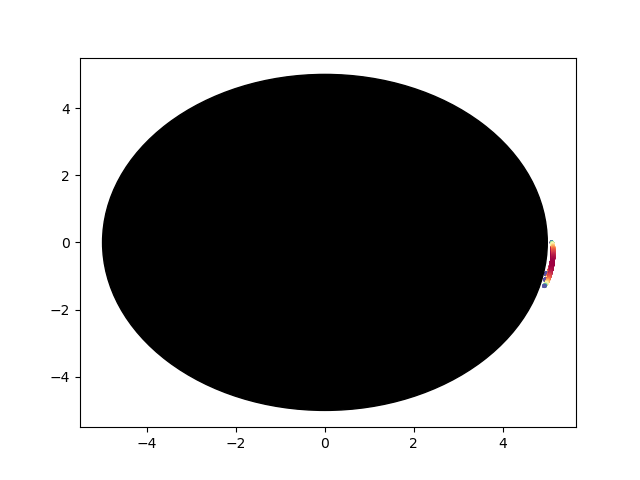

In [50]:
fig, ax = plt.subplots()
# ax.grid()
sim2.draw(ax=ax)

In [51]:
f = Flashlight(5.3,0,0,3,15,-30)
# g = SchwarzschildGravitizer2D(0,0,20)
g = SchwarzschildGravitizerSpherical(0,0,0,5)
sim2 = Simulator(f,g)

In [52]:
sim2.reset()

In [53]:
sim2.evolve(13.5,0.1)

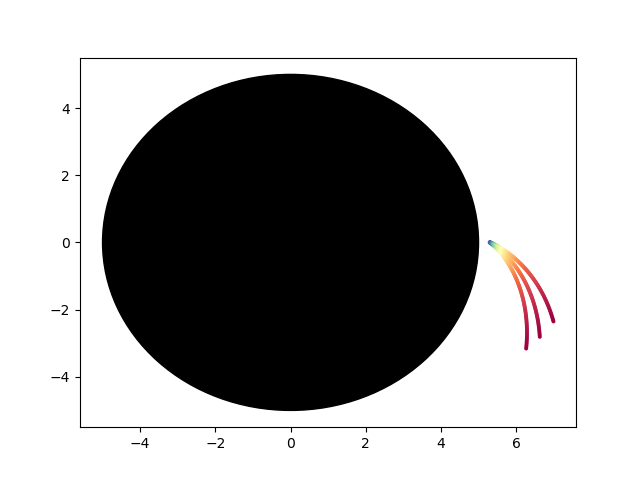

In [54]:
fig, ax = plt.subplots()
# ax.grid()
sim2.draw(ax=ax)

In [56]:
f = Flashlight(5.3,0,0,3,90,-45)
# g = SchwarzschildGravitizer2D(0,0,20)
g = SchwarzschildGravitizerSpherical(0,0,0,5)
sim2 = Simulator(f,g)

In [57]:
sim2.reset()

In [58]:
sim2.evolve(6,0.1)

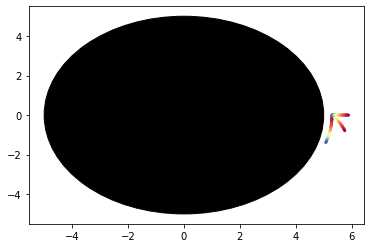

In [59]:
%matplotlib inline
fig, ax = plt.subplots()
# ax.grid()
sim2.draw(ax=ax)

In [60]:
sim2.evolve(8,0.05)

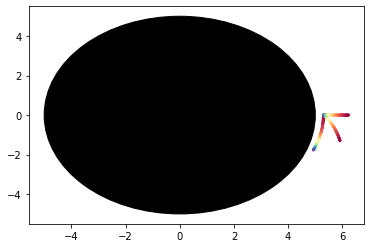

In [61]:
%matplotlib inline
fig, ax = plt.subplots()
# ax.grid()
sim2.draw(ax=ax)

In [62]:
sim2.evolve(10,0.1)

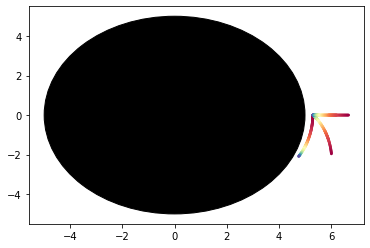

In [63]:
%matplotlib inline
fig, ax = plt.subplots()
# ax.grid()
sim2.draw(ax=ax)